In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
#gray1 = "awifs_ndvi_201701_15_1_clipped.tif"
#gray2="awifs_ndvi_201701_15_2_clipped.tif"
#gray1_img = Image.open(gray1)

In [0]:
! git clone https://github.com/nikhithamalkapuram/ml_datasets.git

Cloning into 'ml_datasets'...
remote: Enumerating objects: 10314, done.
remote: Total 10314 (delta 0), reused 0 (delta 0), pack-reused 10314
Receiving objects: 100% (10314/10314), 360.36 MiB | 11.79 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (10302/10302), done.


In [0]:
from osgeo import gdal
import numpy as np
import sys
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import glob

In [0]:
def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list

path = glob.glob("ml_datasets/Clipped_NDVI/*.tif") #or jpg
list_ = []

cv_image = [read_img(list_, img) for img in path]
#cv_image_list=read_img(list_,path)
print(len(cv_image))
print(len(cv_image[0]))
print(cv_image[0])
cv_img_list=cv_image[0]

48
48
[array([[255, 255, 255, ...,  34,  36,  31],
       [255, 255, 255, ...,  29,  31,  32],
       [255, 255, 255, ...,  31,  34,  34],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ...,  45,  46,  47],
       [255, 255, 255, ...,  50,  50,  47],
       [255, 255, 255, ...,  50,  49,  47],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ...,  49,  48,  47],
       [255, 255, 255, ...,  52,  51,  50],
       [255, 255, 255, ...,  52,  51,  50],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ...,  69,  75,  71],
       [255, 255, 255, ...,  74,  73,  76],
       [255, 255, 255, ...,  78,

In [0]:
ndvi_list=[] 

In [0]:

for k in cv_img_list:
  ndvipos=k/255
  v = numpy.zeros([3,2135,2118],dtype = numpy.float64)
  map1 = [[204,102,0],[153,255,51],[0,204,0],[0,102,0]]

  for i in range(k.shape[0]):
    for j in range(k.shape[1]):
      if ndvipos[i][j] <0.1:
        
        v[0][i][j] = map1[0][0]
        v[1][i][j] = map1[0][1]
        v[2][i][j] = map1[0][2]
      if ndvipos[i][j] <=0.3 and ndvipos[i][j]>=0.2:
        
        v[0][i][j] = map1[1][0]
        v[1][i][j] = map1[1][1]
        v[2][i][j] = map1[1][2]
      if ndvipos[i][j] <=0.5 and ndvipos[i][j]>=0.4:
        
        v[0][i][j] = map1[2][0]
        v[1][i][j] = map1[2][1]
        v[2][i][j] = map1[2][2]
      if ndvipos[i][j] > 0.5:
        
        v[0][i][j] = map1[3][0]
        v[1][i][j] = map1[3][1]
        v[2][i][j] = map1[3][2]
  ndvi_list.append(v)


In [0]:
ndvi_img = []
for i in ndvi_list:
  ndvi_img.append(make_lupton_rgb(i[0],i[1],i[2]))


In [0]:
ndvi_diff_list = []

In [0]:
for i in range(len(ndvi_img)):
  ndvi_diff_list.append(ndvi_img[i]-ndvi_img[i+1])


In [0]:
from PIL import Image
import numpy 
import matplotlib.pyplot as plt
file = "awifs_ndvi_201701_15_1_clipped.tif"
im = Image.open(file)
imarray = numpy.array(im)
#imarray.shape
nor_arr = (imarray/255)*2 -1
height,width = nor_arr.shape
nor_arr_copy = nor_arr[0:height,0:width]
v = numpy.zeros([3,2135,2118],dtype = numpy.float64)
map1 = [[204,102,0],[153,255,51],[0,204,0],[0,102,0]]
nor_arr_copy=nor_arr_copy.flatten()
cr=cg=cb=0
for i in range(imarray.shape[0]):
  for j in range(imarray.shape[1]):
    if nor_arr[i][j] <0.1:
      cr+=1
      v[0][i][j] = map1[0][0]
      v[1][i][j] = map1[0][1]
      v[2][i][j] = map1[0][2]
    if nor_arr[i][j] <=0.3 and nor_arr[i][j]>=0.2:
      cb+=1
      v[0][i][j] = map1[1][0]
      v[1][i][j] = map1[1][1]
      v[2][i][j] = map1[1][2]
    if nor_arr[i][j] <=0.5 and nor_arr[i][j]>=0.4:
      cg+=1
      v[0][i][j] = map1[2][0]
      v[1][i][j] = map1[2][1]
      v[2][i][j] = map1[2][2]
    if nor_arr[i][j] > 0.5:
      v[0][i][j] = map1[3][0]
      v[1][i][j] = map1[3][1]
      v[2][i][j] = map1[3][2]
print(v)

[[[  0.   0.   0. ... 204. 204. 204.]
  [  0.   0.   0. ... 204. 204. 204.]
  [  0.   0.   0. ... 204. 204. 204.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]
  ...
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]]


In [0]:
print(cr,cg,cb)

4189094 14185 64480


In [0]:
nor_arr_copy.shape

(4521930,)

In [0]:
from astropy.visualization import make_lupton_rgb
vnew=make_lupton_rgb(v[0],v[1],v[2])

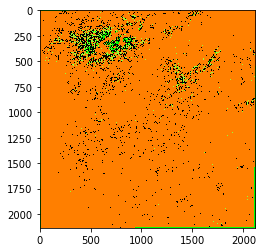

In [0]:
plt.imshow(vnew)

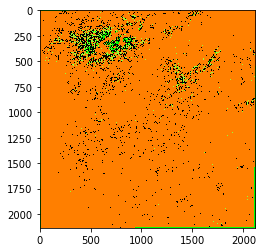

In [0]:
plt.imshow(vnew)

In [0]:
# assuming it to be ndvi positive grayscale image
ndvipos=imarray/255
v = numpy.zeros([3,2135,2118],dtype = numpy.float64)
map1 = [[204,102,0],[153,255,51],[0,204,0],[0,102,0]]
cr=cg=cb=c2=0
for i in range(imarray.shape[0]):
  for j in range(imarray.shape[1]):
    if ndvipos[i][j] <0.1:
      cr+=1
      v[0][i][j] = map1[0][0]
      v[1][i][j] = map1[0][1]
      v[2][i][j] = map1[0][2]
    if ndvipos[i][j] <=0.3 and ndvipos[i][j]>=0.2:
      cb+=1
      v[0][i][j] = map1[1][0]
      v[1][i][j] = map1[1][1]
      v[2][i][j] = map1[1][2]
    if ndvipos[i][j] <=0.5 and ndvipos[i][j]>=0.4:
      cg+=1
      v[0][i][j] = map1[2][0]
      v[1][i][j] = map1[2][1]
      v[2][i][j] = map1[2][2]
    if ndvipos[i][j] > 0.5:
      c2+=1
      v[0][i][j] = map1[3][0]
      v[1][i][j] = map1[3][1]
      v[2][i][j] = map1[3][2]
print(v)

[[[  0.   0.   0. ...   0.   0. 153.]
  [  0.   0.   0. ...   0. 153. 153.]
  [  0.   0.   0. ... 153. 153. 153.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[102. 102. 102. ...   0.   0. 255.]
  [102. 102. 102. ...   0. 255. 255.]
  [102. 102. 102. ... 255. 255. 255.]
  ...
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]]

 [[  0.   0.   0. ...   0.   0.  51.]
  [  0.   0.   0. ...   0.  51.  51.]
  [  0.   0.   0. ...  51.  51.  51.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]]


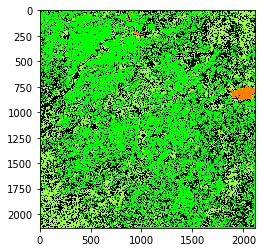

In [0]:
vnew2=make_lupton_rgb(v[0],v[1],v[2])
plt.imshow(vnew2)

In [0]:
print(cr,cg,cb,c2)

28770 1399157 864291 721353


In [0]:
im2 = Image.open(gray2)
imarray2 = numpy.array(im2)
#imarray.shape
ndvipos2 = (imarray2/255)

In [0]:
v2 = numpy.zeros([3,2135,2118],dtype = numpy.float64)
for i in range(imarray2.shape[0]):
  for j in range(imarray2.shape[1]):
    if ndvipos2[i][j] <0.1:
      cr+=1
      v2[0][i][j] = map1[0][0]
      v2[1][i][j] = map1[0][1]
      v2[2][i][j] = map1[0][2]
    if ndvipos2[i][j] <=0.3 and ndvipos2[i][j]>=0.2:
      cb+=1
      v2[0][i][j] = map1[1][0]
      v2[1][i][j] = map1[1][1]
      v2[2][i][j] = map1[1][2]
    if ndvipos2[i][j] <=0.5 and ndvipos2[i][j]>=0.4:
      cg+=1
      v2[0][i][j] = map1[2][0]
      v2[1][i][j] = map1[2][1]
      v2[2][i][j] = map1[2][2]
    if ndvipos2[i][j] > 0.5:
      c2+=1
      v2[0][i][j] = map1[3][0]
      v2[1][i][j] = map1[3][1]
      v2[2][i][j] = map1[3][2]
print(v)

[[[  0.   0.   0. ... 153.   0. 153.]
  [  0.   0.   0. ...   0. 153. 153.]
  [  0.   0.   0. ... 153. 153. 153.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[102. 102. 102. ... 255.   0. 255.]
  [102. 102. 102. ...   0. 255. 255.]
  [102. 102. 102. ... 255. 255. 255.]
  ...
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]
  [102. 102. 102. ... 102. 102. 102.]]

 [[  0.   0.   0. ...  51.   0.  51.]
  [  0.   0.   0. ...   0.  51.  51.]
  [  0.   0.   0. ...  51.  51.  51.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]]


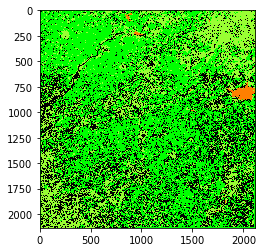

In [0]:
vnew2=make_lupton_rgb(v[0],v[1],v[2])
plt.imshow(vnew2)

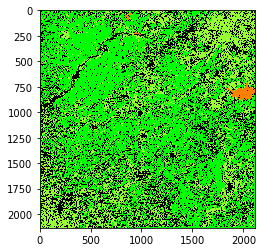

In [0]:
vnew3=make_lupton_rgb(v2[0],v2[1],v2[2])
plt.imshow(vnew3)

In [0]:
ndvi_diff=vnew3-vnew2

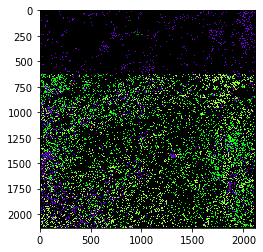

In [0]:
plt.imshow(ndvi_diff)

In [0]:
print(ndvi_diff)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [103   2 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [103   2 205]
  [103   2 205]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [103   2 205]
  [103   2 205]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [0]:
print(ndvi_diff[0][0][0])

0


In [0]:
distance = np.linalg.norm(vnew3[:,:,0]-vnew2[:,:,0])
print(distance)

91881.24193762294


In [0]:
lp = []
ln = []
width = ndvi_diff[0].shape[1]
height = ndvi_diff[0].shape[0]
for l in ndvi_diff_img:
  count=ncount=0
  for i in range(3):
    for j in range(width):
      for k in range(height):
        if ndvi_diff[k][j][i]>0:
          count+=1
        if ndvi_diff[k][j][i]<=0:
          ncount+=1
  lp.append(count/(3*width*height))
  ln.append(ncount/(3*width*height))

In [0]:
max_limit = max(max(lp),max(ln))
min_limit = min(min(lp),min(ln))
mon_yr = ["1Jan2017","16Jan2017","1Feb2017","16Feb2017","1Mar2017","16Mar2017","1Apr2017","16Apr2017","1May2017","16May2017","1Jun2017","16Jun2017","1July2017","16July2017","1Aug2017","16Aug2017","1Sept2017","16Sept2017","1Oct2017","16Oct2017","1Nov2017","16Nov2017","1Dec2017","16Dec2017","1Jan2018","16Jan2018","1Feb2018","16Feb2018","1Mar2018","16Mar2018","1Apr2018","16Apr2018","1May2018","16May2018","1Jun2018","16Jun2018","1July2018","16July2018","1Aug2018","16Aug2018","1Sept2018","16Sept2018","1Oct2018","16Oct2018","1Nov2018","16Nov2018","1Dec2018","16Dec2018"]
plt.plot(mon_yr,lp, ‘bo-', 
	  mon_yr, ln, ‘r*:')

In [0]:
print(ndvi_diff.shape)

(2135, 2118, 3)


In [0]:
print(ncount,count)

11472300 2093490


In [0]:
den_dec=ncount/(2135*2118)

In [0]:
print(den_dec)

2.537036177030604
